<a href="https://colab.research.google.com/github/karaage0703/covid19_memo/blob/master/covid19_visualization_json.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 新型コロナウイルスの感染動向を可視化・分析するためのノートブック

COVID19感染動向データをGoogle Colabで可視化・分析するために、個人的に作成しているものです。

内容の正確性を保証するものではありませんので、ご注意下さい。

以下リポジトリでPR受付中です。

https://github.com/karaage0703/covid19_memo

# 変更履歴
- 2020/04/01 新規作成

## 東京のデータの分析
### 東京のデータダウンロードと読み込み
東京都の感染動向サイトのjsonデータをダウンロード

In [0]:
!wget --no-check-certificate --output-document=covid19_tokyo.json 'https://raw.githubusercontent.com/tokyo-metropolitan-gov/covid19/development/data/data.json'

--2020-04-01 16:20:59--  https://raw.githubusercontent.com/tokyo-metropolitan-gov/covid19/development/data/data.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 224400 (219K) [text/plain]
Saving to: ‘covid19_tokyo.json’

covid19_tokyo.json  100%[===================>] 219.14K  --.-KB/s    in 0.05s   

2020-04-01 16:21:00 (4.25 MB/s) - ‘covid19_tokyo.json’ saved [224400/224400]



jsonデータをpandasを使って読み込み

In [0]:
import pandas as pd
data = pd.read_json('covid19_tokyo.json')

データが読み込めているか確認

### 東京の感染者数データの可視化
matplotlibをインポート

In [0]:
import matplotlib.pyplot as plt

日付のデータを読み込み

In [0]:
date_data = []
for i in range(len(data['inspection_persons']['labels'])):
    date_data.append(data['inspection_persons']['labels'][i][0:10])
print(date_data)

['2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31']


検査実施数のデータ可視化

<BarContainer object of 68 artists>

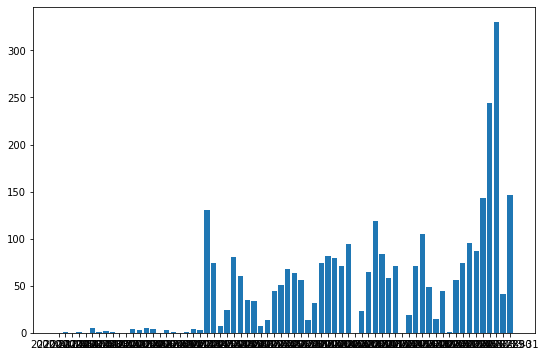

In [0]:
plt.figure(figsize=(9,6))
plt.bar(date_data, data['inspection_persons']['datasets'][0]['data'])

陽性患者数のデータ可視化

In [0]:
patients_data = []
for i in range(len(data['inspection_persons']['labels'])):
    patients_data.append(data['patients_summary']['data'][i]['小計'])
print(patients_data)

[1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 8, 5, 0, 3, 3, 0, 3, 1, 0, 3, 0, 3, 1, 0, 1, 2, 0, 1, 4, 8, 6, 6, 0, 0, 3, 6, 2, 2, 10, 3, 0, 12, 9, 7, 11, 7, 2, 16, 17, 41, 47, 40, 63, 68, 13, 78]


<BarContainer object of 68 artists>

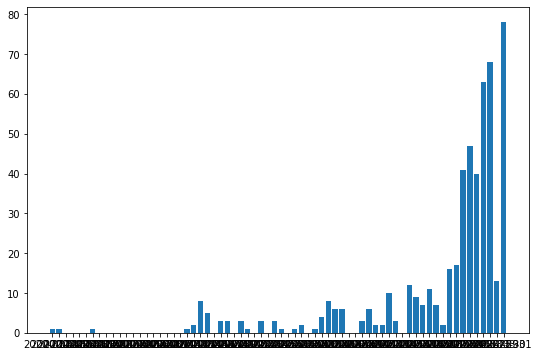

In [0]:
plt.figure(figsize=(9,6))
plt.bar(date_data, patients_data)

検査実施数に対する陽性患者数の割合（0〜1.0）を計算

In [0]:
import numpy as np
np_patients_data = np.array(patients_data)
np_inspection_persons = np.array(data['inspection_persons']['datasets'][0]['data'])

np_patients_inspection_ratio = np_patients_data / np_inspection_persons

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


検査実施数に対する陽性患者数の割合（0〜1.0）の時系列データを可視化

<BarContainer object of 68 artists>

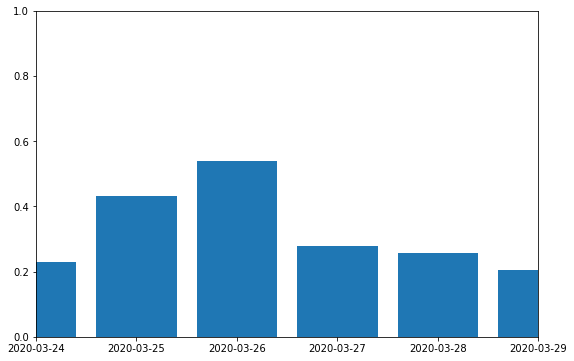

In [0]:
plt.figure(figsize=(9,6))
plt.xlim(60, 65)
plt.ylim(0, 1)
plt.bar(date_data, np_patients_inspection_ratio)

## 愛知県のデータ分析
### 愛知のデータダウンロードと読み込み
愛知の感染動向サイトのjsonデータをダウンロード

In [0]:
!wget --no-check-certificate --output-document=covid19_aichi.json 'https://raw.githubusercontent.com/code4nagoya/covid19/development/data/data.json'

--2020-04-01 16:34:28--  https://raw.githubusercontent.com/code4nagoya/covid19/development/data/data.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86105 (84K) [text/plain]
Saving to: ‘covid19_aichi.json’

covid19_aichi.json  100%[===================>]  84.09K  --.-KB/s    in 0.02s   

2020-04-01 16:34:28 (3.29 MB/s) - ‘covid19_aichi.json’ saved [86105/86105]



pandasでjson形式のファイルを読み込み

In [0]:
data = pd.read_json('covid19_aichi.json')

日付のデータ読み込み

In [0]:
date_data = []
for i in range(15):
    date_data.append(data['inspections_summary']['data'][i+2]['日付'])
print(date_data)

['2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29']


検査人数のデータ読み込み

In [0]:
inspection_data = []
for i in range(15):
    inspection_data.append((int)(data['inspections_summary']['data'][i+2]['小計']))
print(inspection_data)

[806, 50, 263, 110, 273, 262, 58, 91, 89, 185, 164, 178, 181, 138, 54]


陽性患者のデータ読み込み

In [0]:
patients_data = []
for i in range(15):
    patients_data.append(data['patients_summary']['data'][i+49]['小計'])
print(patients_data)

[0, 2, 2, 5, 4, 5, 2, 2, 2, 3, 6, 3, 3, 4, 3]


検査数に対する感染者数の割合（0〜1.0）を計算

In [0]:
np_patients_data = np.array(patients_data)
np_inspection_data = np.array(inspection_data)

np_patients_inspection_ratio = np_patients_data / np_inspection_data

検査実施数に対する陽性患者数の割合（0〜1.0）の時系列データを可視化

<BarContainer object of 15 artists>

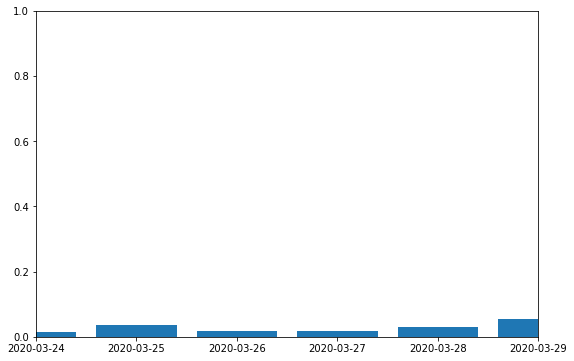

In [0]:
plt.figure(figsize=(9,6))
plt.xlim(9, 14)
plt.ylim(0, 1)

plt.bar(date_data, np_patients_inspection_ratio)

# References
- https://qiita.com/fujisawakoichi/items/843d177b635f411d5b8d